

Here we are defining some vectors (defined as the sine and cosine of different parameters). The vectors are defined in this block, and our goal is to compute the DFT using both my implementation and MATLAB's implementation!


In [1]:
% Define the vectors
N = 8; % 8x8 matrix
k = 0:N-1; % indices varying
v1 = sin(2*pi*k/N);
v2 = sin(4*pi*k/N);
v3 = cos(2*pi*k/N);


We are now formulating a DFT matrix through the definition of the Discrete Fourier Transform and applying it to construct the new vectors!


In [2]:
% Formulate DFT matrix
W = exp(-1j*2*pi/N);
n = (0:N-1).'*(0:N-1);
DFT_matrix = W .^ n;

% Compute DFT of each vector via matrix multiplication
V1_DFT = DFT_matrix * v1.';
V2_DFT = DFT_matrix * v2.';
V3_DFT = DFT_matrix * v3.';


Here we are making a graphical representation of the DFT using frequencies.



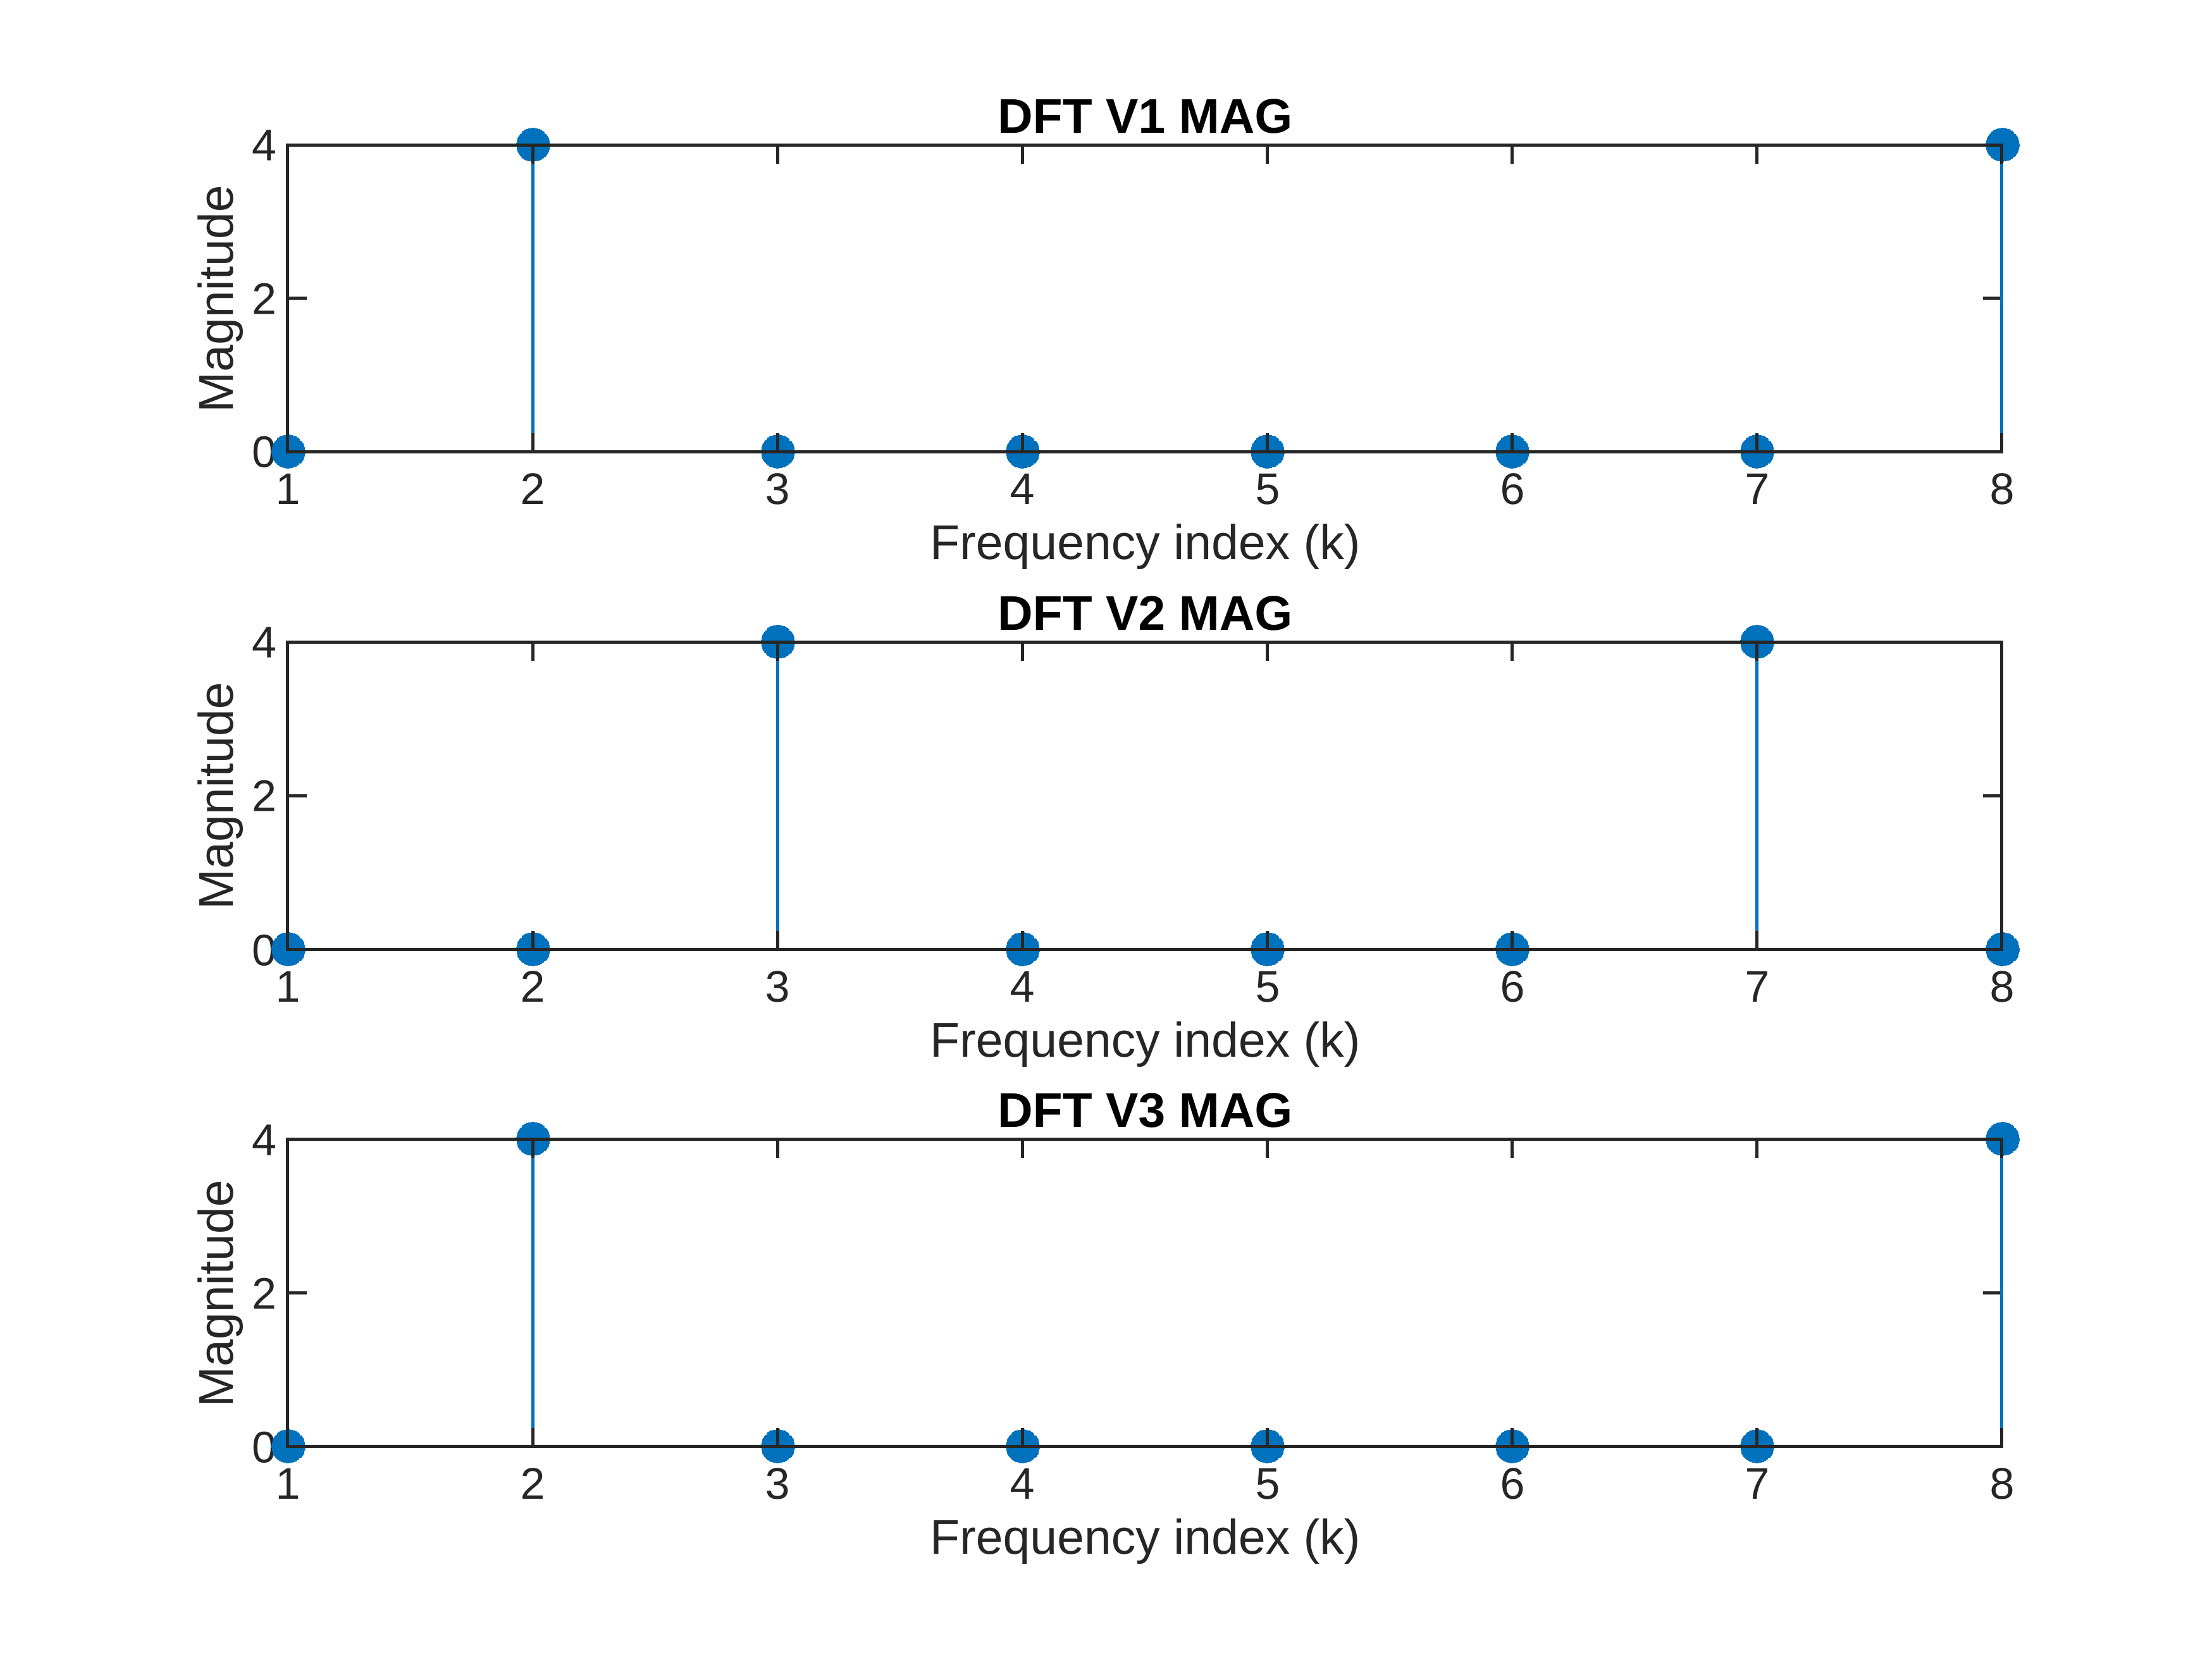

In [3]:
% Making the graph
figure;
subplot(3,1,1); %makes 3 plots of 1 each
stem(abs(V1_DFT), 'filled');
title('DFT V1 MAG');
xlabel('Frequency index (k)');
ylabel('Magnitude');
subplot(3,1,2);
stem(abs(V2_DFT), 'filled');
title('DFT V2 MAG');
xlabel('Frequency index (k)');
ylabel('Magnitude');
subplot(3,1,3);
stem(abs(V3_DFT), 'filled');
title('DFT V3 MAG');
xlabel('Frequency index (k)');
ylabel('Magnitude');


Note that when doing this, we're using the absolute value or magnitude of the coefficients instead of the actual result because the result is complex and would be challenging to plot. Note that the imaginary coefficient is the frequency while the real coefficient is the amplitude.



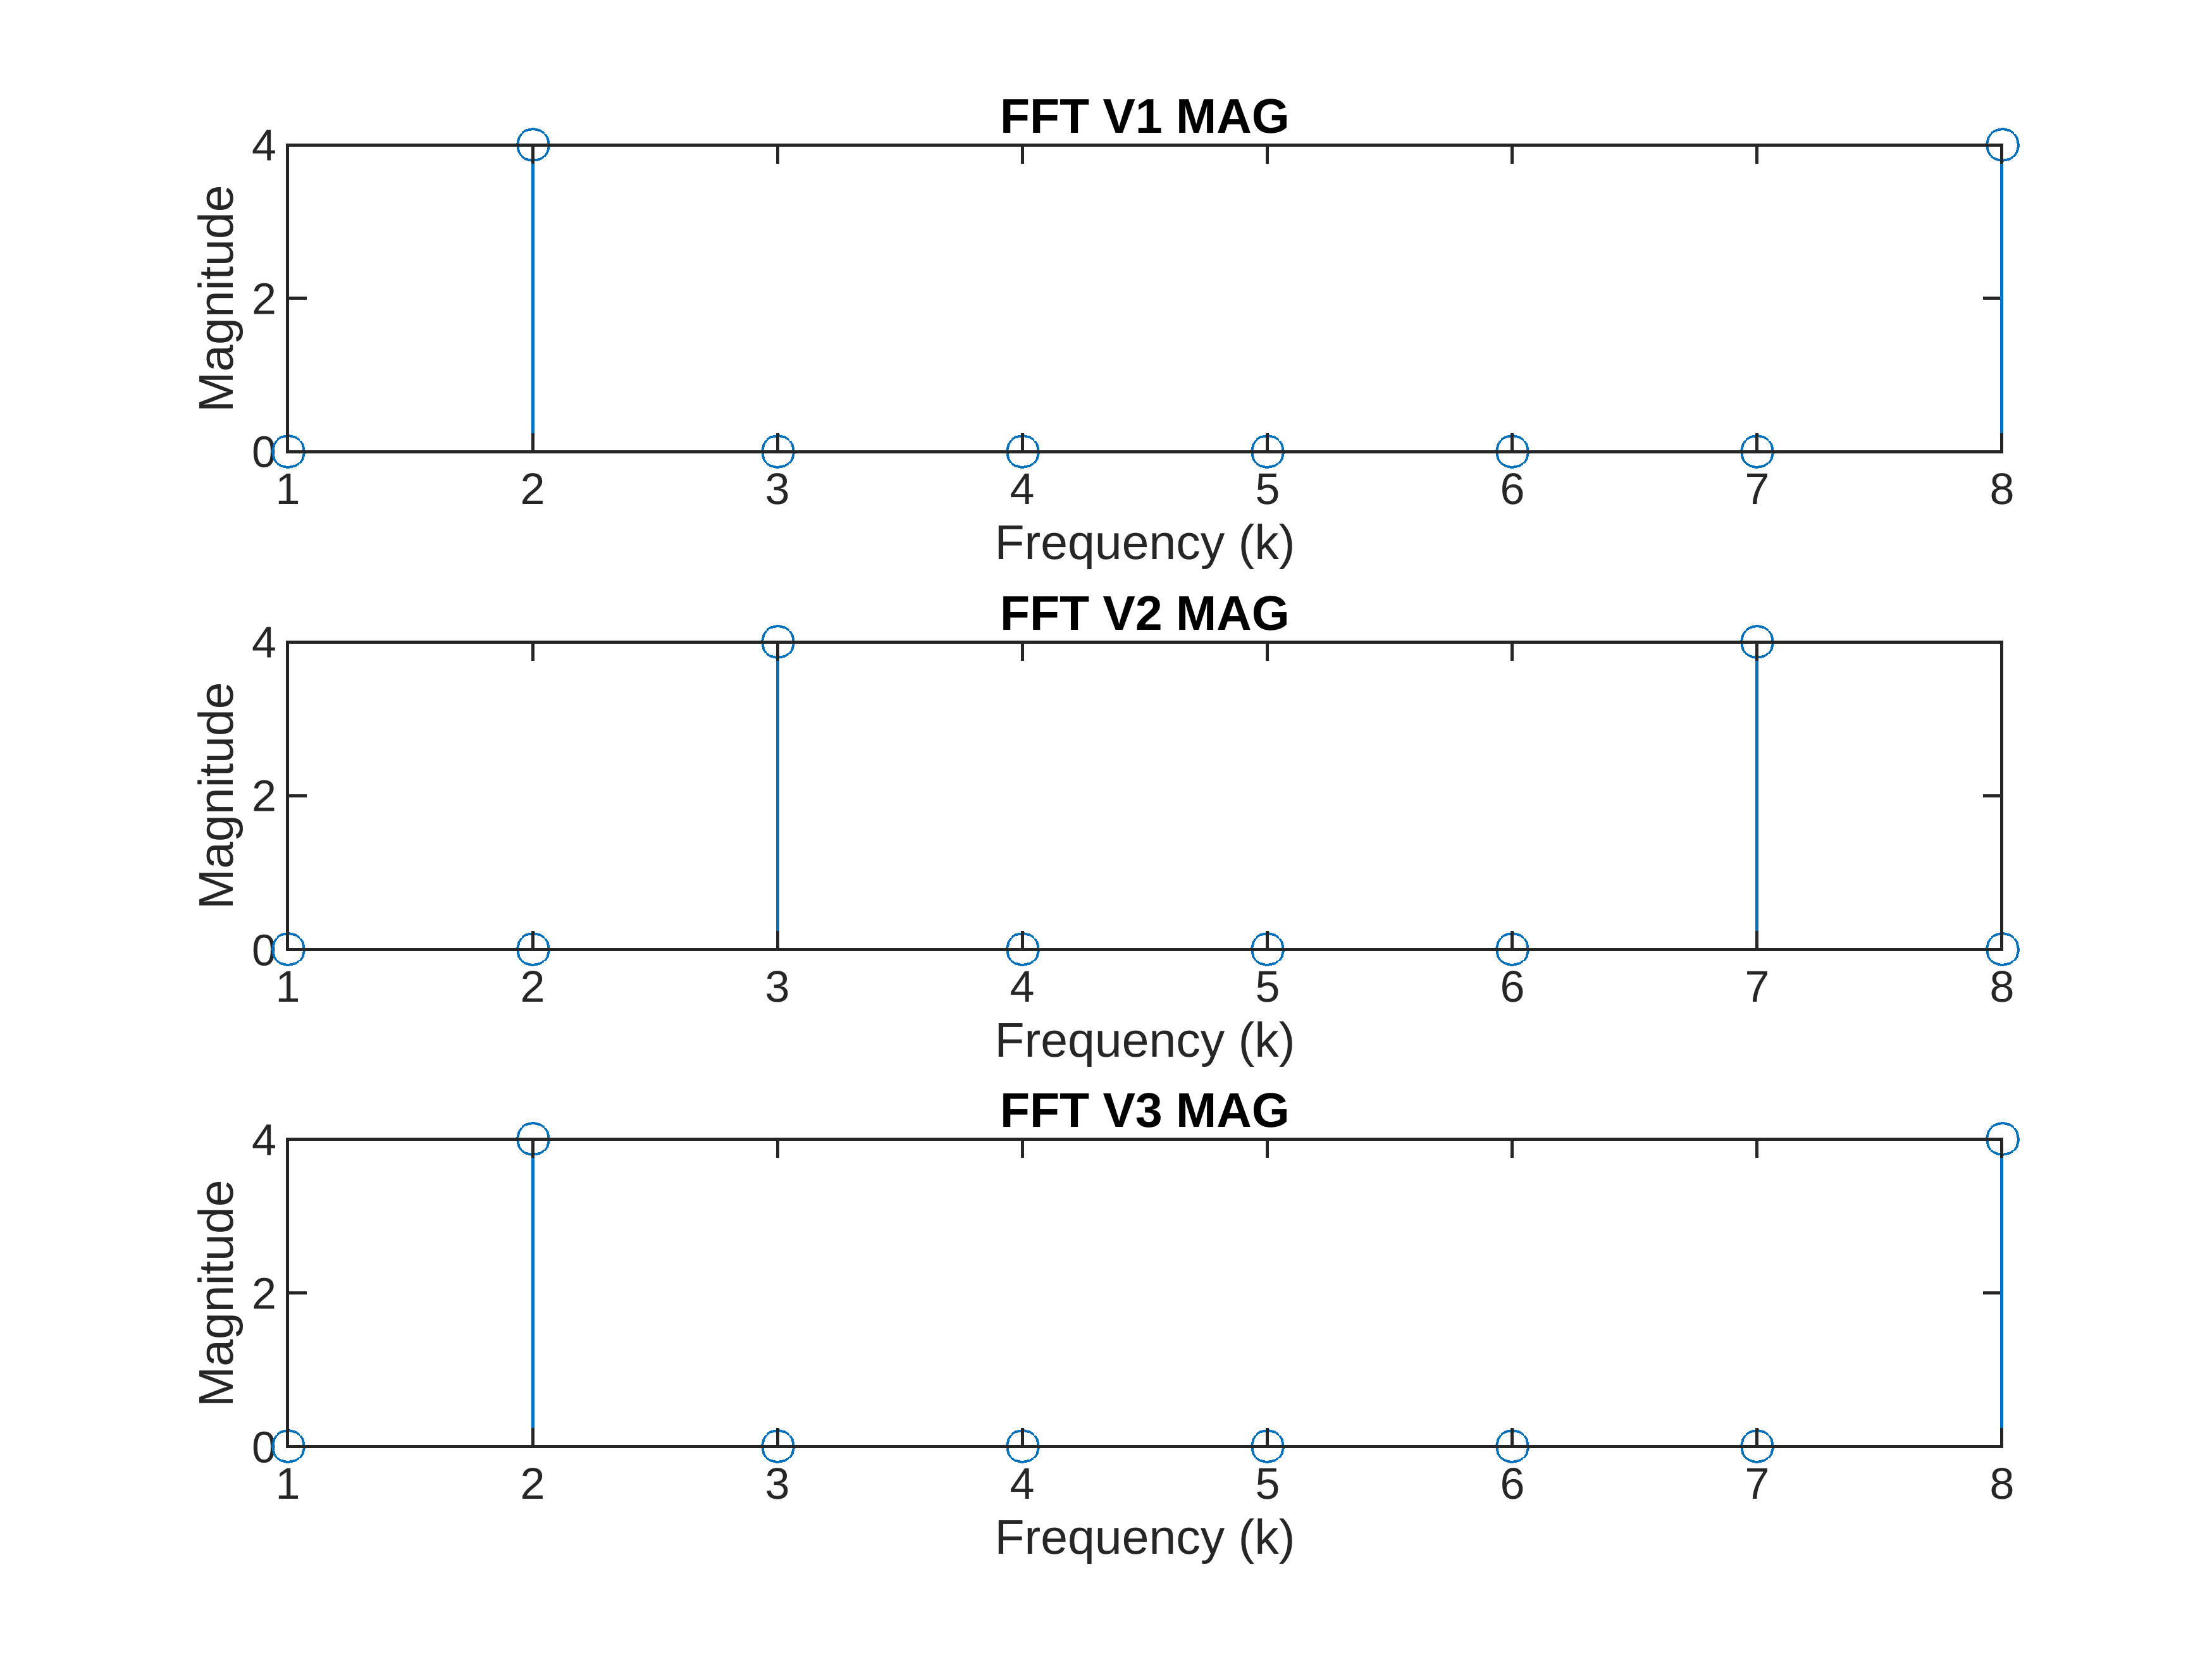

In [4]:
%Computing FFT%
fft_v1 = fft(v1);
fft_v2 = fft(v2);
fft_v3 = fft(v3);
%plotting the graph v1
subplot(3, 1, 1);
stem(abs(fft_v1));
title('FFT V1 MAG');
xlabel('Frequency (k)');
ylabel('Magnitude');
%plotting the graph v2
subplot(3, 1, 2);
stem(abs(fft_v2));
title('FFT V2 MAG');
xlabel('Frequency (k)');
ylabel('Magnitude');
%plotting the graph v3
subplot(3, 1, 3);
stem(abs(fft_v3));
title('FFT V3 MAG');
xlabel('Frequency (k)');
ylabel('Magnitude');


Note that the above is the exact equivalent, except we are using the MATLAB's Fast Fourier Transform instead. That being said, this is also *wayyy* faster than using my implementation as mentioned in my notes.


But, how much faster is it really? Let's try and reimplement the DFT as a function and compare!


In [5]:
% redefined the dft implementation above into an actual function
function X = dft(x)
    N = length(x);
    n = (0:N-1).';
    W = exp(-1j*2*pi/N);
    DFT_matrix = W .^ (n * n.');
    X = DFT_matrix * x(:);
end


At the top we have some parameters to play with (like the length of the vector) \-\- the vector generated is random, but we are trying to see at what length do we notice a big difference between the DFT and the FFT implementations of the Fourier Transform.


In [6]:
% input size parameter (played around with this for a bit to get this
% value)
input_size = 10000;

% generating random data to apply transformation based on input size
x = randn(input_size, 1);

% tic toc
tic;
X1 = dft(x);
time_dft = toc;
% tic toc
tic;
X2 = fft(x);
time_fft = toc;
% Display results
fprintf('DFT Implementation: %.6f seconds\n', time_dft);

DFT Implementation: 12.172224 seconds

In [7]:
fprintf('FFT Implementation: %.6f seconds\n', time_fft);

FFT Implementation: 0.005313 seconds


The difference between the two is obviously very noticeable with an input size of 10,000 (and is also becomes statistically significant above the x=700 ish input range as well. It shows how the FFT is *significantly* faster!

